In [1]:
import os
import copy
import numpy as np
import matplotlib.pyplot as plt

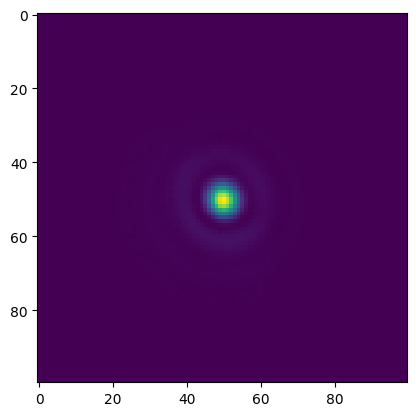

In [2]:
%matplotlib inline
# Load spot data
folder_name_red = 'IPRF Data/Spot Characterization/20x Objective/Red'
spot_image_red = np.zeros((2048, 2448))
for file in os.listdir(folder_name_red):
    # Load tiff image as numpy array. TIFF image has 3 colors but image is actually grayscale
    if file.endswith('.tif'):
        img = plt.imread(os.path.join(folder_name_red, file))[:,:,0]
        spot_image_red += img
subarray_size = 100

spot_center_red = np.unravel_index(np.argmax(spot_image_red[400:800, 1000:1500]), spot_image_red.shape)
spot_center_red = (640, 1174)
spot_image_red_subarray = spot_image_red[spot_center_red[0]-50:spot_center_red[0]+50, spot_center_red[1]-50:spot_center_red[1]+50]
spot_center_shift = np.unravel_index(np.argmax(spot_image_red_subarray), spot_image_red_subarray.shape)
spot_center_red = (spot_center_red[0]-50+spot_center_shift[0], spot_center_red[1]-50+spot_center_shift[1])
spot_image_red = spot_image_red[spot_center_red[0]-subarray_size//2:spot_center_red[0]+subarray_size//2, spot_center_red[1]-subarray_size//2:spot_center_red[1]+subarray_size//2]
plt.imshow(spot_image_red)
plt.show()

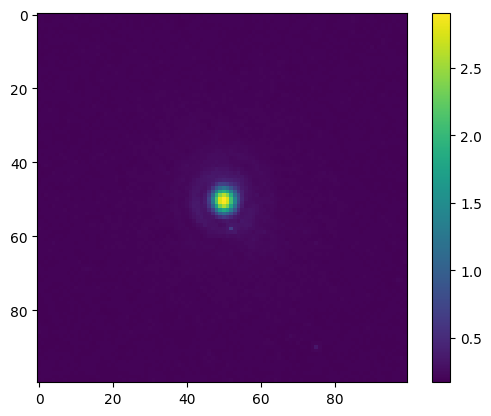

In [ ]:
%matplotlib inline
# Load spot data
folder_name_blue = 'IPRF Data/Spot Characterization/20x Objective/Blue'
spot_image_blue = np.zeros((2048, 2448))
for file in os.listdir(folder_name_blue):
    # Load png image as numpy array.
    if file.endswith('.png') and 'zpos_50' in file:
        img = plt.imread(os.path.join(folder_name_blue, file))
        spot_image_blue += img
subarray_size = 100

# spot_center_blue = np.unravel_index(np.argmax(spot_image_blue[400:800, 1000:1500]), spot_image_blue.shape)
# xpos, ypos of spot
spot_center_blue = (938, 1358)
# Find the actual center of the spot. It should be within 50 pixels of spot_center_blue
spot_image_blue_subarray = spot_image_blue[spot_center_blue[0]-50:spot_center_blue[0]+50, spot_center_blue[1]-50:spot_center_blue[1]+50]
spot_center_shift = np.unravel_index(np.argmax(spot_image_blue_subarray), spot_image_blue_subarray.shape)
spot_center_blue = (spot_center_blue[0]-50+spot_center_shift[0], spot_center_blue[1]-50+spot_center_shift[1])
spot_image_blue = spot_image_blue[spot_center_blue[0]-subarray_size//2:spot_center_blue[0]+subarray_size//2, spot_center_blue[1]-subarray_size//2:spot_center_blue[1]+subarray_size//2]
plt.imshow(spot_image_blue)
plt.colorbar()
plt.show()

nir_spot_zpos_200_3.png
nir_spot_zpos_200_2.png
nir_spot_zpos_200_1.png


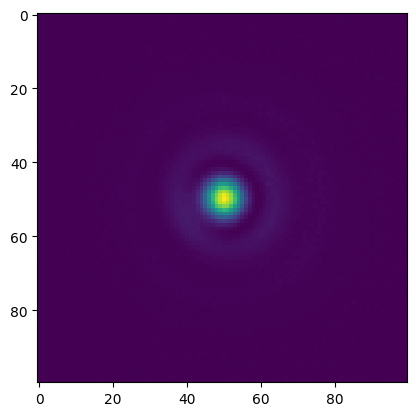

In [4]:
%matplotlib inline
# Load spot data
folder_name_nir = 'IPRF Data/Spot Characterization/20x Objective/NIR'
spot_image_nir = np.zeros((2048, 2448))
for file in os.listdir(folder_name_nir):
    # Load png image as numpy array. TIFF image has 3 colors but image is actually grayscale
    if file.endswith('.png') and 'zpos_200' in file:
        print(file)
        img = plt.imread(os.path.join(folder_name_nir, file))
        spot_image_nir += img
subarray_size = 100

# Find center of mass of spot_image_nir[950:1000, 1300:1400])
# spot_center_nir = np.unravel_index(np.argmax(spot_image_nir[950:1000, 1300:1400]), spot_image_nir.shape)
# print(spot_center_nir)
spot_center_nir = (980, 1318)
spot_image_nir_subarray = spot_image_nir[spot_center_nir[0]-50:spot_center_nir[0]+50, spot_center_nir[1]-50:spot_center_nir[1]+50]
spot_center_shift = np.unravel_index(np.argmax(spot_image_nir_subarray), spot_image_nir_subarray.shape)
spot_center_nir = (spot_center_nir[0]-50+spot_center_shift[0], spot_center_nir[1]-50+spot_center_shift[1])
spot_image_nir = spot_image_nir[spot_center_nir[0]-subarray_size//2:spot_center_nir[0]+subarray_size//2, spot_center_nir[1]-subarray_size//2:spot_center_nir[1]+subarray_size//2]
plt.imshow(spot_image_nir)
plt.show()

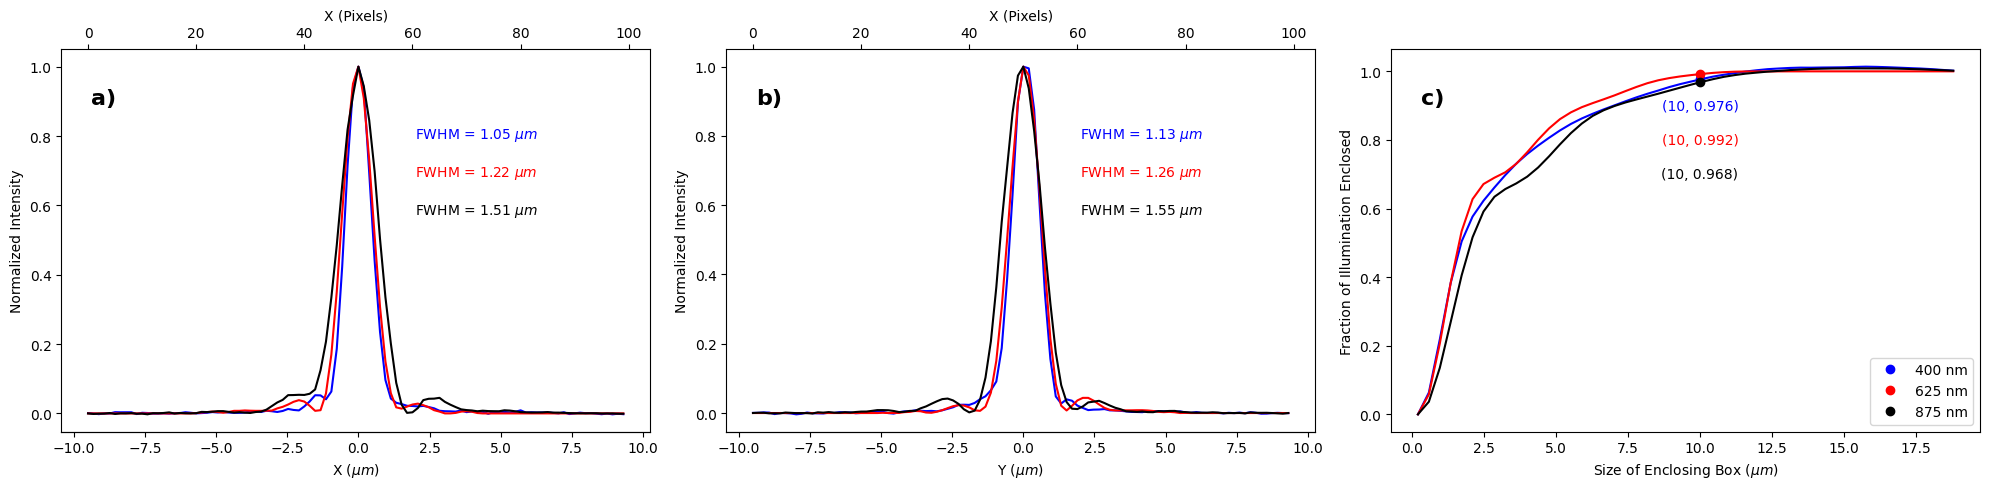

In [5]:
%matplotlib inline

# Define inner and outer radius for the annulus
inner_radius = 40
outer_radius = 50

# Plot the updated spot_image
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# First tile: image of spot_image
# axs[0].imshow(spot_image)
# axs[0].set_xlabel('X (pixels)')
# axs[0].set_ylabel('Y (pixels)')
# cbar = plt.colorbar(axs[0].imshow(spot_image), ax=axs[0], orientation='vertical', fraction=0.046, pad=0.04)
# cbar.set_label('Intensity')

microns_per_pixel = 0.19

spot_images = [copy.deepcopy(spot_image_blue), copy.deepcopy(spot_image_red), copy.deepcopy(spot_image_nir)]
colors=['blue', 'red', 'black']
labels=['400 nm', '625 nm', '875 nm']

for i, spot_image in enumerate(spot_images):

    # Create a mask for the annulus
    y, x = np.ogrid[:spot_image.shape[0], :spot_image.shape[1]]
    center = (spot_image.shape[0] // 2, spot_image.shape[1] // 2)
    distance_from_center = np.sqrt((x - center[1])**2 + (y - center[0])**2)

    annulus_mask = (distance_from_center >= inner_radius) & (distance_from_center <= outer_radius)

    # Calculate the mean background value using the annulus
    mean_background = np.mean(spot_image[annulus_mask])

    # Subtract the mean background value from all pixels of spot_image
    spot_image -= mean_background

    # Second tile: horizontal profile through the center
    center_row = copy.deepcopy(spot_image[spot_image.shape[0] // 2, :])
    # Normalize y axis
    center_row /= np.max(center_row)
    axs[0].plot(center_row, color=colors[i])
    # Interpolate the first half of center_col to find where it crosses half_max
    crossing_point_low = np.interp(0.5, center_row[:spot_image.shape[0] // 2], np.arange(spot_image.shape[0] // 2))
    x_points_high = np.arange(spot_image.shape[0] // 2)[::-1]
    y_points_high = center_row[spot_image.shape[0] // 2:][::-1]
    crossing_point_high = subarray_size // 2 + np.interp(0.5, y_points_high, x_points_high)
    fwhm_microns = (crossing_point_high - crossing_point_low) * microns_per_pixel
    # Write fwhm on plot
    axs[0].text(0.6, 0.9 - 0.1 * (i + 1), f'FWHM = {fwhm_microns:.2f} $\mu m$', transform=axs[0].transAxes, ha='left', va='top', color=colors[i])

    # Third tile: vertical profile through the center
    center_col = copy.deepcopy(spot_image[:, spot_image.shape[1] // 2])
    center_col /= np.max(center_col)
    axs[1].plot(center_col, color=colors[i])
    # Interpolate the first half of center_col to find where it crosses half_max
    crossing_point_low = np.interp(0.5, center_col[:spot_image.shape[0] // 2], np.arange(spot_image.shape[0] // 2))
    x_points_high = np.arange(spot_image.shape[0] // 2)[::-1]
    y_points_high = center_col[spot_image.shape[0] // 2:][::-1]
    crossing_point_high = subarray_size // 2 + np.interp(0.5, y_points_high, x_points_high)
    fwhm_microns = (crossing_point_high - crossing_point_low) * microns_per_pixel
    # fwhm_microns = np.sum(center_col > half_max) * microns_per_pixel
    # Write fwhm on plot
    axs[1].text(0.6, 0.9 - 0.1 * (i + 1), f'FWHM = {fwhm_microns:.2f} $\mu m$', transform=axs[1].transAxes, ha='left', va='top', color=colors[i])

    # Fourth tile: fraction of signal enclosed vs. size of enclosing box
    max_size = min(spot_image.shape)
    sizes = np.arange(1, max_size + 1, 2)
    fractions = []

    for size in sizes:
        box = spot_image[spot_image.shape[0] // 2 - size // 2:spot_image.shape[0] // 2 + size // 2,
                        spot_image.shape[1] // 2 - size // 2:spot_image.shape[1] // 2 + size // 2]
        fractions.append(np.sum(box) / np.sum(spot_image))

    axs[2].plot(sizes * microns_per_pixel, fractions, color=colors[i])
    # Find fraction enclosed in box of size 9 microns by interpolating sizes and fractions
    fraction_enclosed_10_microns = np.interp(10, sizes * microns_per_pixel, fractions)
    axs[2].plot(10, fraction_enclosed_10_microns, 'o', color=colors[i], label=labels[i])
    axs[2].text(10, 0.98 - 0.1 * (i + 1), f'(10, {fraction_enclosed_10_microns:.3f})', va='bottom', ha='center', color=colors[i])


# Put x axis at the top of the plot
axs[0].xaxis.tick_top()
axs[0].xaxis.set_label_position('top')
axs[0].set_xlabel('X (Pixels)')
axs[0].set_ylabel('Normalized Intensity')
axs[1].xaxis.tick_top()
axs[1].xaxis.set_label_position('top')
axs[1].set_xlabel('X (Pixels)')
axs[1].set_ylabel('Normalized Intensity')
axs[2].legend()
# Add a second x axis to the tops of the second and third tiles, converting the pixels to microns
def pixels_to_microns(x):
    return (x - 50) * microns_per_pixel

secax_x2 = axs[0].secondary_xaxis('bottom', functions=(pixels_to_microns, lambda x: x / microns_per_pixel))
secax_x2.set_xlabel(r'X ($\mu m$)')

secax_y2 = axs[1].secondary_xaxis('bottom', functions=(pixels_to_microns, lambda x: x / microns_per_pixel))
secax_y2.set_xlabel(r'Y ($\mu m$)')

# Label tiles a, b, c, d
for i, label in enumerate(['a)', 'b)', 'c)']):
    axs[i].text(0.05, 0.9, label, transform=axs[i].transAxes, fontsize=16, fontweight='bold', va='top')

axs[2].set_xlabel(r'Size of Enclosing Box ($\mu m$)')
axs[2].set_ylabel('Fraction of Illumination Enclosed')
plt.tight_layout()
plt.show()


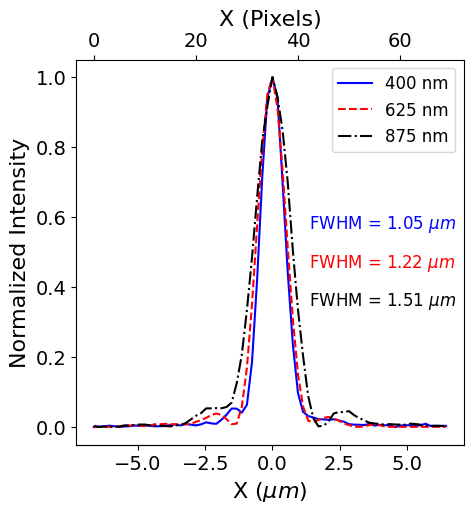

In [8]:
%matplotlib inline
# Adjust font size
plt.rcParams.update({'font.size': 14})
# Define inner and outer radius for the annulus
inner_radius = 40
outer_radius = 50
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

microns_per_pixel = 0.19

spot_images = [copy.deepcopy(spot_image_blue), copy.deepcopy(spot_image_red), copy.deepcopy(spot_image_nir)]
colors=['blue', 'red', 'black']
labels=['400 nm', '625 nm', '875 nm']
format_strings = ['b-', 'r--', 'k-.']

for i, spot_image in enumerate(spot_images):

    # Create a mask for the annulus
    y, x = np.ogrid[:spot_image.shape[0], :spot_image.shape[1]]
    center = (spot_image.shape[0] // 2, spot_image.shape[1] // 2)
    distance_from_center = np.sqrt((x - center[1])**2 + (y - center[0])**2)

    annulus_mask = (distance_from_center >= inner_radius) & (distance_from_center <= outer_radius)

    # Calculate the mean background value using the annulus
    mean_background = np.mean(spot_image[annulus_mask])

    # Subtract the mean background value from all pixels of spot_image
    spot_image -= mean_background

    # Second tile: horizontal profile through the center
    center_row = copy.deepcopy(spot_image[spot_image.shape[0] // 2, :])
    # Normalize y axis
    center_row /= np.max(center_row)
    ax.plot(center_row[15:85], format_strings[i], label=labels[i])
    # Interpolate the first half of center_col to find where it crosses half_max
    crossing_point_low = np.interp(0.5, center_row[:spot_image.shape[0] // 2], np.arange(spot_image.shape[0] // 2))
    x_points_high = np.arange(spot_image.shape[0] // 2)[::-1]
    y_points_high = center_row[spot_image.shape[0] // 2:][::-1]
    crossing_point_high = subarray_size // 2 + np.interp(0.5, y_points_high, x_points_high)
    fwhm_microns = (crossing_point_high - crossing_point_low) * microns_per_pixel
    # Write fwhm on plot
    ax.text(0.6, 0.7 - 0.1 * (i + 1), f'FWHM = {fwhm_microns:.2f} $\mu m$', transform=ax.transAxes, ha='left', va='top', color=colors[i], fontsize=12)


# Put x axis at the top of the plot
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set_xlabel('X (Pixels)', fontsize=16)
ax.set_ylabel('Normalized Intensity', fontsize=16)
# Add a second x axis to the tops of the second and third tiles, converting the pixels to microns
def pixels_to_microns(x):
    return (x - 35) * microns_per_pixel

secax_x2 = ax.secondary_xaxis('bottom', functions=(pixels_to_microns, lambda x: x / microns_per_pixel))
secax_x2.set_xlabel(r'X ($\mu m$)', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.show()
